# A4-Q5: Parametric Spline

In [96]:
import numpy as np
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
import math

## (a) Write your nickname and display it

## (b) Hardcode interpolation points

In [97]:
x1 = [0, 0.5, 0.75, 1, 1.25, 1.8, 2.75, 3.25, 3.5, 4.25, 5, 5.5]
y1 = [0, 3, 5, 0, 2, 4, 4.75, 0, 3.5, 4.6, 3.5, 0]

x2 = [7.3, 6, 7, 8, 7.8, 9, 9.5, 9.5, 10, 11, 11.5, 11.25, 11.5, 13, 11.5, 13, 14, 15, 15.5, 14.5, 14]
y2 = [2.5, 1, 0, 0.5, 2, 0, 2, 0, 1.5, 2.2, 5, 0, 3, 4, 2, 0, 1, 0, 1, 2, 1]


## (c) `ParametricSpline`

In [98]:
def ParametricSpline(Sx,Sy):
    '''
     x_cs, y_cs, t = ParametricSpline(Sx,Sy)

       Takes an array of x- and y-values, and returns a parametric
       cubic spline in the form of two piecewise-cubic data structures
       (one for the x-component and one for the y-component), as well as
       the corresponding parameter values.
       
       The splines use natural boundary conditions.

       Input:
        Sx   array of x-values
        Sy   array of y-values

       Output:
        x_cs function that evaluates the cubic spline for x-component
        y_cs function that evaluates the cubic spline for y-component
        t is the array of parameter values use for the splines

       Note that x_cs(t) and y_cs(t) give Sx and Sy, respectively.
    '''

    # These lines are just placeholders... replace them
    x_cs = lambda t:[0]
    y_cs = lambda t:[0]
    t = np.zeros_like(Sx)
    # === YOUR CODE HERE ===

    t[0] = 0
    for i in range(1, len(Sx)):
        t[i] = t[i - 1] + math.sqrt((Sx[i] - Sx[i - 1]) ** 2 + (Sy[i] - Sy[i - 1]) ** 2)
    print(t)

    x_cs = make_interp_spline(t, Sx, k=3, bc_type="natural")
    y_cs = make_interp_spline(t, Sy, k=3, bc_type="natural")
    return x_cs, y_cs, t

## (d) Find parametric splines for each segment

In [99]:
# === YOUR CODE HERE ===
x_cs1, y_cs1, t1 = ParametricSpline(x1, y1)
x_cs2, y_cs2, t2 = ParametricSpline(x2, y2)

[ 0.          3.04138127  5.0569457  10.0631918  12.07875624 14.15300309
 15.36337493 20.13961823 23.64853544 24.97988813 26.31124083 29.84677474]
[ 0.          1.98494332  3.39915689  4.51719088  6.03046547  8.36284623
 10.42439904 12.42439904 14.00553787 15.22619343 18.07048596 23.07673206
 26.08713071 27.88990634 30.38990634 32.88990634 34.30411991 35.71833347
 36.83636746 38.25058102 39.36861501]


## (e) Plot the segments

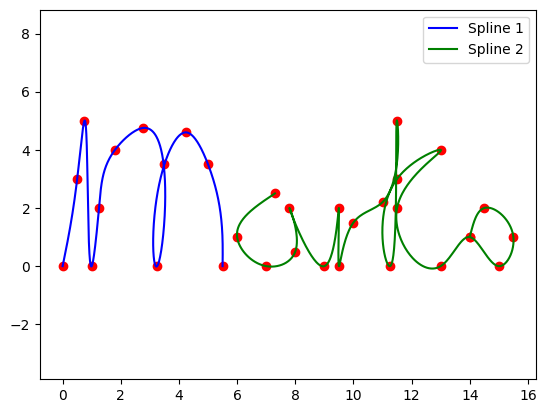

In [100]:
# === YOUR CODE HERE ===
t_eval1 = np.linspace(t1.min(), t1.max(), 1000)
x_eval1 = x_cs1(t_eval1)
y_eval1 = y_cs1(t_eval1)

t_eval2 = np.linspace(t2.min(), t2.max(), 1000)
x_eval2 = x_cs2(t_eval2)
y_eval2 = y_cs2(t_eval2)

plt.plot(x_eval1, y_eval1, 'b', label='Spline 1')
plt.scatter(x1, y1, color='red')
plt.plot(x_eval2, y_eval2, 'g', label='Spline 2')
plt.scatter(x2, y2, color='red')
plt.axis('equal')
plt.legend()
plt.show()